In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<div style="color:#FF1F26;
           display:fill;
           border-style: solid;
           border-color:#C1C1C1;
           font-size:16px;
           font-family:Calibri;
           background-color:#B75351;">
<h2 style="text-align: center;
           padding: 10px;
           color:#FFFFFF;">
======= Sentiment and Named Entity Recognition (NER) Analysis of Audit Comments =======
</h2>
</div>

<div style=" background-color:#4b371c;text-align:left; padding: 13px 13px; border-radius: 8px; color: white; font-size: 16px">
This notebook focuses on analyzing audit comments by auditors using <b>sentiment analysis</b> and <b>named entity recognition (NER)</b>. The goal is to gain insights into the sentiment expressed in the comments and identify organizations mentioned in the comments. The analysis helps users to automatically pre-filter organizations with higher positive and negative sentiments for further diving into detailed anlaysis.
<br><br>
    <b>1. Data Preprocessing:</b>
<br>- Load the audit comments dataset.
<br>- Perform necessary data cleaning and preprocessing steps.
<br>- Prepare the data for sentiment analysis and named entity recognition.
<br><br>
<b>2. Sentiment Analysis:</b>
<br>- Apply sentiment analysis techniques to classify the sentiment of the audit comments.
<br>- Utilize pre-trained sentiment analysis models or implement custom sentiment analysis algorithms.
<br>- Assign sentiment labels (positive, negative, or neutral) to each comment.
<br><br>
<b>3. Named Entity Recognition (NER):</b>
<br>- Employ named entity recognition techniques to identify organization names in the audit comments.
<br>- Utilize pre-trained NER models or implement custom NER algorithms.
<br>- Extract and tag organization names from the comments.
<br><br>    
<b>4. Analysis of Organizations:</b>
<br>- Retrieve the list of organizations mentioned in the comments using NER.
<br>- Calculate the sentiment distribution (positive, negative, and neutral) for each organization.
<br>- Identify organizations with higher positive, negative, and neutral sentiments.
<br>- Generate visualizations, such as bar charts, to present the sentiment distribution of organizations.
<br><br>
<b>5. Results and Insights:</b>
<br>- Summarize the findings of the sentiment analysis and NER on the audit comments.
<br>- Discuss organizations with higher positive, negative, and neutral sentiments.
<br>- Present any patterns or trends observed in the sentiment distribution.
<br>- Provide insights on the sentiment expressed in the audit comments and organizations mentioned.
</div>

<div style="padding:10px;
            color:white;
            margin:5;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:15px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700"> Table of Contents</div>

<a id="toc"></a>
- [1. Notebook Setup](#1)
- [2. Exploratory Data Analysis](#2)
- [3. Tokenization](#3)
- [4. Preparation of Target Labels](#4)
- [5. Sentiment Model Training](#5)
- [6. Sentiment Analysis](#6)
- [7. Named Entity Recognition (NER)](#7)
- [8. Formation of Organization Entity](#8)
- [9. Analysis of Audit Comments](#9)


<a id="1"></a>
# <b><span style='color:#FF0000'>1. Notebook Setup</span></b>

In [1]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 12.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.0
    Uninstalling fsspec-2025.3.0:
      Successfully uninstalled fsspec-2025.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.0 requires fsspec==2025.3.0, but you have fsspec 2024.12.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which i

In [2]:
# Import the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from IPython.display import display

# tensorflow tensors
import tensorflow as tf

## Load the dataset from Hugging Face

In [3]:
from datasets import load_dataset

# import the auditor comment dataset from Hugging Face
dataset = load_dataset("FinanceInc/auditor_sentiment")

# label: a label corresponding to the class as a string:
# 2 - positive; 1 - neutral; 0 - negative'

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/3.71k [00:00<?, ?B/s]

dataset_infos.json:   0%|          | 0.00/800 [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/327k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/80.9k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/3877 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/969 [00:00<?, ? examples/s]

In [4]:
# Train dataset
dataset['train']

Dataset({
    features: ['sentence', 'label'],
    num_rows: 3877
})

In [5]:
# Test dataset
dataset['test']

Dataset({
    features: ['sentence', 'label'],
    num_rows: 969
})

<a id="2"></a>
# <b><span style='color:#FF0000'>2. Exploratory Data Analysis</span></b>

<div style=" background-color:#b22222;text-align:left; padding: 13px 13px; border-radius: 8px; color: white; font-size: 16px">
Explore the structure, format, and composition of the text dataset. Identify and handle issues such as missing data, noise, inconsistencies, and formatting errors. Preprocess the text data by removing irrelevant information, special characters, stopwords, and performing tasks like tokenization and stemming.
</div>

## Distribution of Sentiment Labels

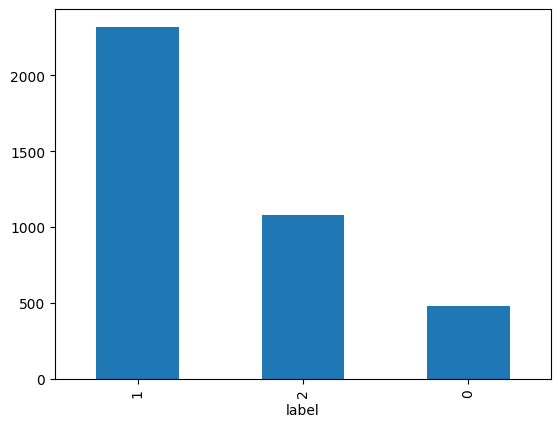

In [6]:
# Distribution of Target Label
label_list = list(dataset['train']['label'])
df = pd.DataFrame(label_list, columns=['label'])

# to display the bar charts by target values
rst = df['label'].value_counts().plot(kind='bar')


In [9]:
df.head()

,label
0,2
1,2
2,2
3,1
4,1


## Positive and Negative Sentiment

In [7]:
# Exmaine the positive and negative comments
positive_dataset = dataset['train'].filter(lambda row: row['label'] == 2)
negative_dataset = dataset['train'].filter(lambda row: row['label'] == 0)

Filter:   0%|          | 0/3877 [00:00<?, ? examples/s]

Filter:   0%|          | 0/3877 [00:00<?, ? examples/s]

In [10]:
# List out some positive comments
positive_dataset[0:5]

{'sentence': ["Altia 's operating profit jumped to EUR 47 million from EUR 6.6 million .",
  'The agreement was signed with Biohit Healthcare Ltd , the UK-based subsidiary of Biohit Oyj , a Finnish public company which develops , manufactures and markets liquid handling products and diagnostic test systems .',
  'Kesko pursues a strategy of healthy , focused growth concentrating on sales and services to consumer-customers .',
  "Elcoteq 's stock of orders has stabilised in the past weeks , Mr Krippl said .",
  'UPM-Kymmene has generated seventeen consecutive quarters of positive Cash Flow from Operations .'],
 'label': [2, 2, 2, 2, 2]}

In [ ]:
# List out some negative comments
negative_dataset[0:5]

<a id="3"></a>
# <b><span style='color:#FF0000'>3. Tokenization</span></b>

<div style=" background-color:#b22222;text-align:left; padding: 13px 13px; border-radius: 8px; color: white; font-size: 16px">
Tokenization in Transformer NLP refers to the process of breaking down a sequence of text, such as a sentence or a document, into individual tokens or subword units. It is a crucial step in natural language processing tasks that involve machine learning models like BERT.
</div>

In [ ]:
# Parameters
seq_len = 512
batch_size = 12

num_samples = len(dataset['train'])

# to prepare the array for target value
print('Training array of size ({} x {})'.format(num_samples, seq_len))

## Load the Transformer Model

In [ ]:
# Checkpoint for the Transfomer
check_point = 'bert-base-uncased'

# Import the Tokenizer of Bert
from transformers import BertTokenizer

# Load the pre-trained model
tokenizer = BertTokenizer.from_pretrained(check_point)

In [ ]:
# tokenize the audit comments in the train dataset
tokens = tokenizer(dataset['train']['sentence'], max_length=seq_len, truncation=True,
                   padding='max_length', add_special_tokens=True,
                   return_tensors='pt')

In [ ]:
# Input ids
tokens['input_ids']

In [ ]:
# Attention masks
tokens['attention_mask']

<a id="4"></a>
# <b><span style='color:#FF0000'>4. Preparation of Target Labels</span></b>

<div style=" background-color:#b22222;text-align:left; padding: 13px 13px; border-radius: 8px; color: white; font-size: 16px">
In a Transformer model, the output layer for target labels depends on the specific task being performed. The Transformer architecture is a versatile framework that can be applied to various natural language processing (NLP) tasks, such as text classification, named entity recognition, machine translation, and more.
</div>

In [ ]:
# first extract the list of sentiment values, i.e. 0 - 2
arr = pd.DataFrame(dataset['train']['label'], columns=['label'])
arr_values = arr['label'].sort_values().unique().tolist()
print('No. of distinct label values : {}'.format(arr_values))

In [ ]:
# Initialize the zero array based on the size of the input_ids / attention masks
labels = np.zeros((num_samples, len(arr_values)))
print('Size of the target label : {}'.format(labels.shape))

In [ ]:
# Assign the sentimen values
labels[np.arange(num_samples), arr['label'].tolist()] = 1
labels

<a id="5"></a>
# <b><span style='color:#FF0000'>5. Sentiment Model Training</span></b>

<div style=" background-color:#b22222;text-align:left; padding: 13px 13px; border-radius: 8px; color: white; font-size: 16px">
Tensorflow Tensors play a fundamental role in NLP tasks as they serve as the primary data structure for storing and manipulating textual data. In Transformation model, tensors play a crucial role in tokenized Text Representation, Embedding Layers and Model Inputs and Outputs
</div>

In [ ]:
# Create the tensorflow tenors from Input Ids, Attention Masks and Labels
ds = tf.data.Dataset.from_tensor_slices((tokens['input_ids'], tokens['attention_mask'], labels))
ds.take(1)

In [ ]:
# Conver the tensors from 3d array of {3) tuples into 2d array of {2,1} tuples
def map_func(input_ids, masks, labels):

    return {'input_ids': input_ids, 'attention_mask': masks}, labels

# then we use the dataset map method to apply this transformation
ds = ds.map(map_func)
# print(len(dataset))

ds = ds.shuffle(10000).batch(batch_size, drop_remainder=True)
# print(len(dataset))

ds.take(1)

In [ ]:
# Create the train and test datasets for Transformer model training
split = 0.8

# we need to calculate how many batches must be taken to create 70% training set
size = int((tokens['input_ids'].shape[0] / batch_size) * split)

print('Size of the train dataset : {}, size of the validation dataset :{}'.format(size, int(tokens['input_ids'].shape[0] / batch_size - size)))

In [ ]:
# Prepare the train and test data
train_ds = ds.take(size)
val_ds = ds.skip(size)

# free up memory
del ds

In [ ]:
# check the train_ds
train_ds

In [ ]:
# check the val_ds
val_ds

## Build and Train the Sentiment Model

<div style=" background-color:#b22222;text-align:left; padding: 13px 13px; border-radius: 8px; color: white; font-size: 16px">
Load a pre-trained language model and fine-tune it, extending the pre-tained model to include the input IDs and attention masks layers placed prior to the embedding layer. Examine the architecture of the pre-trained model to understand its components and how they are connected. Finally, add additional layers or modify the existing layers to adapt the model to your specific fine-tuning task.
</div>

In [ ]:
# Load the Transformer model
from transformers import TFAutoModel

# Set up the pre-tained model of Bert
model = TFAutoModel.from_pretrained(check_point)

In [ ]:
# we can view the pre-tained Bert model using the summary method
model.summary()

## Model Architecture and Structure

In [ ]:
# Two more input layes - input IDs and Attention Masks
input_ids = tf.keras.layers.Input(shape=(512,), name='input_ids', dtype='int32')
mask = tf.keras.layers.Input(shape=(512,), name='attention_mask', dtype='int32')

# Embedding layer of Bert model
embeddings = model.bert(input_ids, attention_mask=mask)[1]  # access final activations (alread max-pooled) [1]
# convert bert embeddings into 5 output classes
layer_1 = tf.keras.layers.Dense(1024, activation='relu')(embeddings)
# Dropout layer with a rate of 0.5
# x = tf.keras.layers.Dropout(0.1)(layer_1)
layer_2 = tf.keras.layers.Dense(3, activation='softmax', name='outputs')(layer_1) # the sentiment has 3 labels

In [ ]:
# initialize model with input layers of Input IDs and Attention Masks and output layer of Outputs
sentiment_model = tf.keras.Model(inputs=[input_ids, mask], outputs=layer_2)

# (optional) freeze bert layer - to decide if the embedding layer is re-trained.
sentiment_model.layers[2].trainable = True

# print the updated model summary
sentiment_model.summary()

## Model Fine-tuning with Additional Layers

In [ ]:
# Training parameters
# optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=1e-5, decay=1e-6)
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=1e-5, decay=1e-6)
loss = tf.keras.losses.CategoricalCrossentropy()
acc = tf.keras.metrics.CategoricalAccuracy('accuracy')

sentiment_model.compile(optimizer=optimizer, loss=loss, metrics=[acc])

In [ ]:
# Re-train the model
history = sentiment_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=3
)

In [ ]:
# free up memory
del train_ds
del val_ds

<a id="6"></a>
# <b><span style='color:#FF0000'>6. Sentiment Analysis</span></b>

<div style=" background-color:#b22222;text-align:left; padding: 13px 13px; border-radius: 8px; color: white; font-size: 16px">
Sentiment analysis is a natural language processing technique used to determine the sentiment or emotional tone conveyed by a piece of text, such as a sentence, review, or social media post. It involves analyzing the text to classify it into positive, negative, or neutral sentiments. By leveraging machine learning algorithms and linguistic patterns, sentiment analysis helps extract valuable insights from large volumes of text data, enabling businesses to understand public opinion, customer feedback, and brand perception.
</div>    

In [ ]:
# The test data of one instance only
def prep_data(text):
    tokens = tokenizer.encode_plus(text, max_length=512,
                                   truncation=True, padding='max_length',
                                   add_special_tokens=True, return_token_type_ids=False,
                                   return_tensors='tf')
    # tokenizer returns int32 tensors, we need to return float64, so we use tf.cast
    return {'input_ids': tf.cast(tokens['input_ids'], tf.float64),
            'attention_mask': tf.cast(tokens['attention_mask'], tf.float64)}

In [ ]:
# The test data in array
def prep_arry_data(text_array):
    tokens = tokenizer.batch_encode_plus(text_array, max_length=512,
                                         truncation=True, padding='max_length',
                                         add_special_tokens=True, return_token_type_ids=False,
                                         return_tensors='tf')
    # tokenizer returns int32 tensors, we need to return float64, so we use tf.cast
    return {'input_ids': tf.cast(tokens['input_ids'], tf.float64),
            'attention_mask': tf.cast(tokens['attention_mask'], tf.float64)}

In [ ]:
# Create a dictionary to map label indices to label names
label_mapping = {
    0: 'Negative',
    1: 'Neutral',
    2: 'Positive'
}

## Single Test Case

In [ ]:
text_array = [
"XXX's strong financial performance exceeded expectations, driven by robust sales growth and effective cost management.",
"XXX demonstrated resilience in challenging economic conditions, maintaining profitability through efficient expense management.",
"XXX's net income declined due to increased operating costs and lower sales volumes. Cost-cutting measures are being implemented.",
"XXX maintains a strong liquidity position with healthy cash reserves, providing a solid foundation for future investments.",
"XXX's profitability has steadily increased, attributed to successful product launches and expanded market reach.",
"XXX's debt management efforts resulted in decreased debt levels and improved debt-to-equity ratio."

]

probs = sentiment_model.predict(prep_arry_data(text_array))

# import numpy as np
pred = np.argmax(probs, axis=1)

# Sentiment output
for count, prediction in enumerate(pred):
    print('The sentiment for test case {} is {}.'.format(count, label_mapping.get(prediction)))

## Dataset of Sentences

In [ ]:
# Sentiment prediction
probs = sentiment_model.predict(prep_arry_data(dataset['test']['sentence']))

# import numpy as np
pred = np.argmax(probs, axis=1)


In [ ]:
df_test = pd.DataFrame(dataset['test']['label'], columns = ['label'])
df_pred = pd.DataFrame(pred, columns = ['label'])

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(df_pred, df_test) * 100

# Print the accuracy
print(f"Prediction Accuracy: {accuracy:.2f}%")

In [ ]:
# Sentiment output
df_pred.head(5)

In [ ]:
# Get the value counts for each sentiment category
pred_counts = pd.Series(pred).value_counts()

# Sort the values by the X-axis (Sentiment) in ascending order
sorted_counts = pred_counts.sort_index()

# Plot the sorted values
sorted_counts.plot(kind='bar')

# Assign custom X-axis tick labels
# Manually specify the desired labels
x_labels = ['Negative', 'Neutral', 'Positive']
plt.gca().set_xticklabels(x_labels)

# Add labels and title
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.title('Sentiment Distribution for Test Dataset')

# Display the chart
plt.show()

In [ ]:
# Sentiment for positive comments
positive_pred = df_pred[df_pred['label'] == 2][0:5]
# positive_pred

# Sample output
for idx in range(5):
    print('The sentiment is \033[1mPositive\033[0m for sentence of "\033[4m{}\033[0m".'.format(dataset['test']['sentence'][positive_pred.index[idx]]))
    print('')

In [ ]:
# Sentiment for negative comments
negative_pred = df_pred[df_pred['label'] == 0][0:5]
# negative_pred

# Sample output
for idx in range(5):
    print('The sentiment is \033[1mNegative\033[0m for sentence of "\033[4m{}\033[0m".'.format(dataset['test']['sentence'][negative_pred.index[idx]]))
    print('')

In [ ]:
# Sentiment for neutral comments
neutral_pred = df_pred[df_pred['label'] == 1][0:5]
# negative_pred

# Sample output
for idx in range(5):
    print('The sentiment is \033[1mNeutral\033[0m for sentence of "\033[4m{}\033[0m".'.format(dataset['test']['sentence'][negative_pred.index[idx]]))
    print('')

<a id="7"></a>
# <b><span style='color:#FF0000'>7. Named Entity Recognition (NER)</span></b>

<div style=" background-color:#b22222;text-align:left; padding: 13px 13px; border-radius: 8px; color: white; font-size: 16px">
Named Entity REcognition (NER) is a natural language processing (NLP) task that involves identifying and classifying named entities in text into predefined categories. Named entities can include names of persons, organizations, locations, dates, quantities, and more. NER aims to extract and label these entities to provide structured information and facilitate information retrieval, question answering, information extraction, and other NLP applications. By recognizing and categorizing named entities, NER plays a crucial role in understanding and extracting valuable information from unstructured text data.
</div>    

In [ ]:
# Parameter
ner_name = 'test'

In [ ]:
# Load the model
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline

checkpoint_2 = "dslim/bert-base-NER"

# Load the pre-trained Bert model for NER
ner_tokenizer = AutoTokenizer.from_pretrained(checkpoint_2)
ner_model = AutoModelForTokenClassification.from_pretrained(checkpoint_2)


In [ ]:
# Use the pipeline for NER
idx = 1
nlp = pipeline("ner", model=ner_model, tokenizer=ner_tokenizer)
# example = dataset['test']['sentence'][idx]
sentences = dataset[ner_name]['sentence']

ner_results = nlp(sentences)
# print(ner_results)
# print('=' * 20)
# print(dataset['test']['sentence'][0:1])

In [ ]:
# Check if no. of results
len(ner_results)

<a id="8"></a>
# <b><span style='color:#FF0000'>8. Formation of Organization Entity</span></b>

<div style=" background-color:#b22222;text-align:left; padding: 13px 13px; border-radius: 8px; color: white; font-size: 16px">
When performing Named Entity Recognition (NER) with BERT, the I-ORG and B-ORG tags are used to construct the entity names. In NER, B-ORG represents the beginning of an organization entity, and I-ORG represents the continuation of that organization entity. By combining consecutive I-ORG and B-ORG tags, we can construct the complete organization entity name, allowing for accurate identification and extraction of organization names from text.
</div>    

In [ ]:
# The Bert model returns B-ORG and I-ORG, the B-ORG is the beginning of an orgnaization entity identified by the model
# The I-ORG is a linked token to the precedent B-ORG or I-ORG token.
# The concantation of consencutive B-ORG and subsequent I-ORG will form the name of the organization entity

entity_dict = {}
entities = []
current_entity = ""
for idx in range(len(ner_results)):
    for token in ner_results[idx]:
        if token['entity'] == "B-ORG":
            if token['word'][0:2] == "##":
                current_entity += token['word'][2:]
            elif current_entity != '':
                entities.append(current_entity)
                current_entity = token['word']
            else:
                current_entity = token['word']
        elif token['entity'] == "I-ORG":
            if token['word'][0:2] == "##":
                current_entity += token['word'][2:]
            else:
                current_entity += " " + token['word']

    entities.append(current_entity) # Append the last token to the entity list

    entity_dict[idx] = entities

    # empty the array and current entity
    entities = []
    current_entity = ""

    #     else:
    #         if current_entity:
    #             entities.append(current_entity)
    #             current_entity = ""

print('No. of records in the NER results : {}'.format(len(entity_dict)))

In [ ]:
# After NER, null return will be removed, and we only need the records with return of organization names

# All records and organization names after the NER
entity_2d_array = [[k, v] for k, values in entity_dict.items() for v in values]

# Remove those records with null return
entity_2d_array_dedup = [sublist for sublist in entity_2d_array if all(item != '' for item in sublist)]

print('No. of organizations in the original NER: {}'.format(len(entity_2d_array)))
print('No. of organizations after the de-duplication: {}'.format(len(entity_2d_array_dedup)))


In [ ]:
# List some of the NER results
entity_2d_array_dedup[:10]

## Merage the Results of Sentiment and NER

In [ ]:
# Sentiment prediction
probs = sentiment_model.predict(prep_arry_data(dataset[ner_name]['sentence']))

# import numpy as np
pred = np.argmax(probs, axis=1)

# Dataframe results
df_pred = pd.DataFrame(pred, columns = ['label'])


In [ ]:
df_pred.value_counts()

In [ ]:
# Merge the third item from sentiment into two_dimensional_array
merged_array = [sublist + [df_pred.iloc[sublist[0]][0]] for sublist in entity_2d_array_dedup]


In [ ]:
# List of index value from the meraged array
idx_array = [idx_array[0] for idx_array in merged_array]
# idx_array = set(idx_array)
len(idx_array)

In [ ]:
entity_array = [idx_array[0] for idx_array in entity_2d_array]

len(entity_array)

## Check if thsoe records with null entity is empty comment

In [ ]:
# Double check those records not in the merged array
missing_items = [item for item in entity_array if item not in idx_array]
print(missing_items[:10])

In [ ]:
# The only reasons is miss sentimenet result is due to null object return in the NER.  Let's check.
entity_2d_array_missing = [item for item in entity_2d_array if item[0] in missing_items]
entity_2d_array_missing[:10]

## Sentiment and NER Results

In [ ]:
df_ner_sentiment = pd.DataFrame(merged_array, columns=['doc_id', 'org_name', 'sentiment_label'])
df_ner_sentiment

<a id="9"></a>
# <b><span style='color:#FF0000'>9. Analysis of Audit Comments</span></b>

In [ ]:
def filter_by_sentiment (label, title):
    # Positive Comments
    df_ner_sentiment_positive = df_ner_sentiment[df_ner_sentiment['sentiment_label'] == label]

#     print(len(df_ner_sentiment_positive))

    result = df_ner_sentiment_positive.groupby('org_name')['doc_id'].count().sort_values(ascending=False)

    # Convert and display dataframe as HTML
    title_str = 'Top 10 Companies with ' + title + ' Audit Comments based on Sentiment Analysis'
    print('='*len(title_str))
    print(title_str)
    print('='*len(title_str))
    display(result.head(10))

#     result_positive = result_positive[result_positive >= 3]
#     result_positive

    # Plot the data as a bar chart
#     plt.bar(result_positive.index, result_positive.values)

    # Set labels and title
#     plt.xlabel('Organization')
#     plt.ylabel('Count')
#     plt.title(title)

    # Rotate the x-axis labels if needed
#     plt.xticks(rotation=90)

    # Show the bar chart
#     plt.show()



In [ ]:
filter_by_sentiment (2, 'Positive')

In [ ]:
filter_by_sentiment (0, 'Negative')

In [ ]:
filter_by_sentiment (1, 'Neutral')

<div style=" background-color:#b22222;text-align:left; padding: 13px 13px; border-radius: 8px; color: white; font-size: 20px">
Thanks for your time to read my notebook. If you like my work, please give me an "upvote" as appreciation. Happy Kaggling together.
</div>    